In [25]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256, 3)


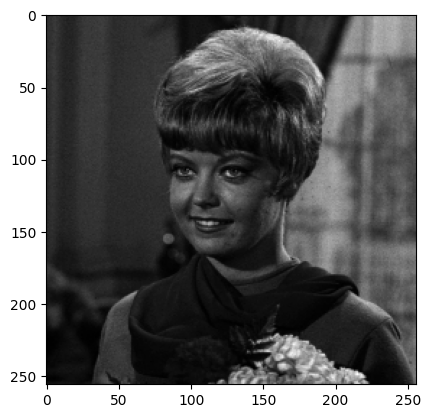

In [38]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/girl.jpg')
print(img.shape)
gimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gimg1, cmap = 'gray')

In [15]:
outimg = np.zeros(gimg1.shape, dtype='uint8')

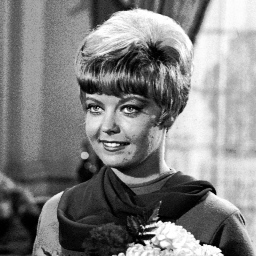

In [39]:
outimg = cv2.equalizeHist(gimg)
cv2_imshow(outimg)

In [47]:
myHist = np.zeros((256,1), dtype= np.int32)

히스토그램 만들기

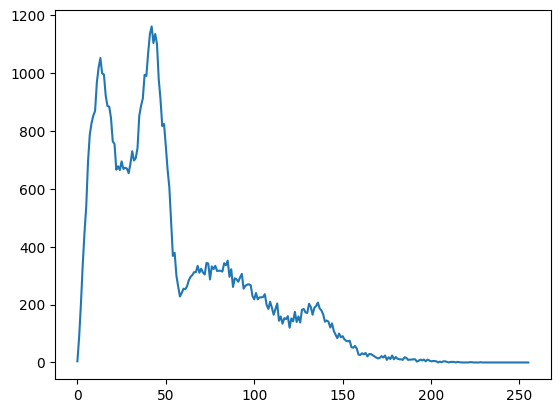

In [48]:
for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    myHist[gimg[h,w]] += 1

plt.plot(myHist)

In [49]:
cumulHist = np.zeros((256, 1), dtype=np.int32)

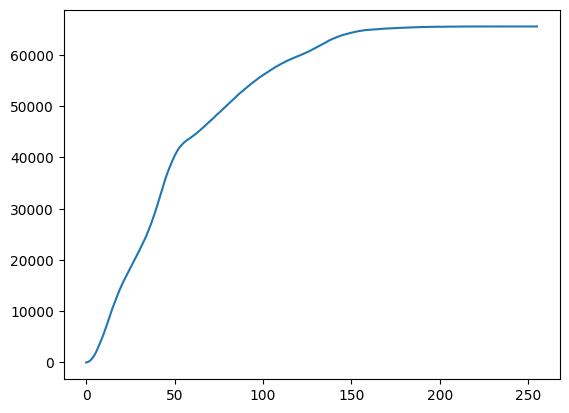

In [50]:
cumulHist[0] = myHist[0]
for i in range(1,256):
  cumulHist[i] = cumulHist[i-1] + myHist[i]

plt.plot(cumulHist)

히스토그램 평활화

In [42]:
equalHist = np.zeros((256, 1), dtype=np.int32)

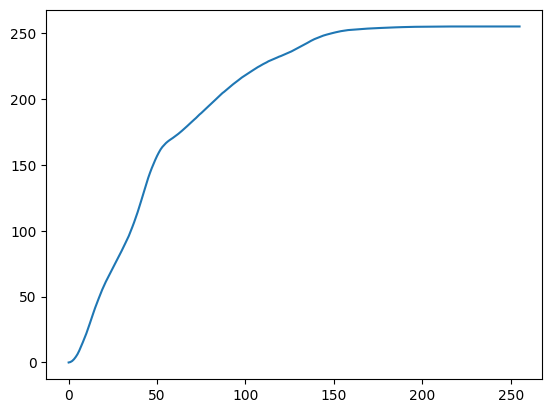

In [44]:
num0fPixel = gimg.shape[0] * gimg.shape[1]
equalHist = cumulHist / num0fPixel
equalHist = equalHist * 255

plt.plot(equalHist)

/tmp/ipython-input-1109175290.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outimg[h,w] = equalHist[gimg[h,w]]


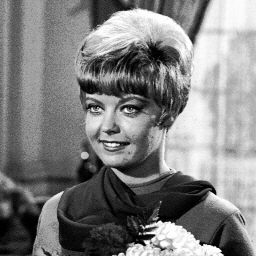

In [46]:
for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    outimg[h,w] = equalHist[gimg[h,w]]

cv2_imshow(outimg)